<a href="https://colab.research.google.com/github/Emilijamaik/flatland-demo_em/blob/main/Info_flatlandui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import gzip
import pickle
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

# Loading data

In [87]:
path = 'flatland_train.data'
X,y = pickle.load(gzip.open(path,'rb')) #(1000,50,50)

# data pre-proc
y[y != 0] -= 2
X = X / 255.

In [88]:
X_train.shape

(7000, 50, 50)

In [89]:
X_test.shape

(3000, 50, 50)

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42) #(1000,50,50)

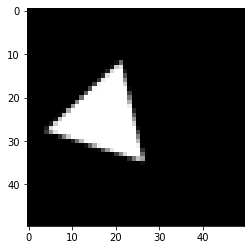

In [91]:
plt.imshow(X_test[0],cmap='gray')

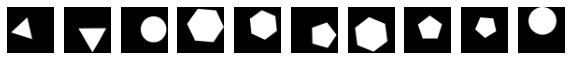

In [92]:
plt.figure(figsize=(10, 10))
for i in range(10):
        plt.subplot(10, 10, 10 + i + 1)
        plt.imshow(X_test[i], cmap='gray')
        plt.axis('off')
plt.show()

In [93]:
from collections import Counter 

Counter(y)

Counter({0.0: 1381, 1.0: 2853, 2.0: 1868, 3.0: 2137, 4.0: 1761})

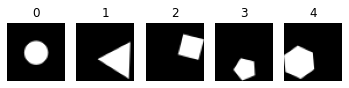

In [94]:
for i in range(5):
    idx= np.where(y_train == i)[0][0]
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[idx],cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show() # padarem po viena skirtinga is kiekvienos klases

TODO: split to train and test set

# DNN

In [97]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(50,50)))
model.add(keras.layers.Dense(160,activation='relu')) 
model.add(keras.layers.Dense(80,activation='relu')) 
model.add(keras.layers.Dense(40,activation='relu')) 
model.add(keras.layers.Dense(40,activation='relu')) 
model.add(keras.layers.Dense(20,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             #optimizer='adam', #NAUJAS OPTIMIZERIS, GALI LABAI PADET!!!
             optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 2500)              0         
                                                                 
 dense_40 (Dense)            (None, 160)               400160    
                                                                 
 dense_41 (Dense)            (None, 80)                12880     
                                                                 
 dense_42 (Dense)            (None, 40)                3240      
                                                                 
 dense_43 (Dense)            (None, 40)                1640      
                                                                 
 dense_44 (Dense)            (None, 20)                820       
                                                                 
 dense_45 (Dense)            (None, 10)              

In [95]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(50,50)))
model.add(keras.layers.Dense(256,activation='relu')) 
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(128,activation='relu')) 
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             #optimizer='adam', #NAUJAS OPTIMIZERIS, GALI LABAI PADET!!!
             optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 2500)              0         
                                                                 
 dense_36 (Dense)            (None, 256)               640256    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dropout_17 (Dropout)        (None, 64)              

In [98]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
219/219 [==============================] - 2s 7ms/step - loss: 1.5090 - accuracy: 0.4284 - val_loss: 1.2539 - val_accuracy: 0.4413
Epoch 2/50
219/219 [==============================] - 1s 6ms/step - loss: 1.1502 - accuracy: 0.5051 - val_loss: 1.0936 - val_accuracy: 0.5307
Epoch 3/50
219/219 [==============================] - 1s 6ms/step - loss: 0.9781 - accuracy: 0.5827 - val_loss: 0.9928 - val_accuracy: 0.5670
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 0.8275 - accuracy: 0.6583 - val_loss: 0.8029 - val_accuracy: 0.6600
Epoch 5/50
219/219 [==============================] - 1s 6ms/step - loss: 0.7053 - accuracy: 0.7136 - val_loss: 0.7318 - val_accuracy: 0.6843
Epoch 6/50
219/219 [==============================] - 1s 6ms/step - loss: 0.6438 - accuracy: 0.7356 - val_loss: 0.6953 - val_accuracy: 0.7120
Epoch 7/50
219/219 [==============================] - 1s 6ms/step - loss: 0.5784 - accuracy: 0.7667 - val_loss: 0.6612 - val_accuracy: 0.7283
Epoch 

In [12]:
model.fit(X,y, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 1.5196 - accuracy: 0.3602
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 1.3743 - accuracy: 0.4689
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 1.2711 - accuracy: 0.4995
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 1.2087 - accuracy: 0.5130
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 1.1682 - accuracy: 0.5191
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 1.1339 - accuracy: 0.5329
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 1.1022 - accuracy: 0.5490
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 1.0763 - accuracy: 0.5547
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 1.0504 - accuracy: 0.5723
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 1.0325 - accuracy: 0.5779

In [99]:
model.save('model.h5')


## Test your model!!!

In [100]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.9557

# Fashion MNIST

In [ ]:
pip install matplotlib

     |████████████████████████████████| 11.3 MB 19.5 MB/s eta 0:00:01    |██████████████▊                 | 5.2 MB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 24.4 MB/s eta 0:00:01     |██▊                             | 256 kB 24.4 MB/s eta 0:00:01
     |████████████████████████████████| 880 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 30.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
# TASK: Create DNN model (using keras) for fashion MNIST dataset.



# - Plot the data
# - How many classes are there?
# - Train NN classifier using keras
# - Can you make a model that is able to overfit the data?
# - Play with dropout and different architectures

import matplotlib.pyplot as plt

from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [19]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(40,activation='relu')) 
model.add(keras.layers.Dense(20,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=0.01),
             metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 40)                31400     
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 32,430
Trainable params: 32,430
Non-trainable params: 0
_________________________________________________________________


In [21]:
import pandas as pd

<AxesSubplot:>

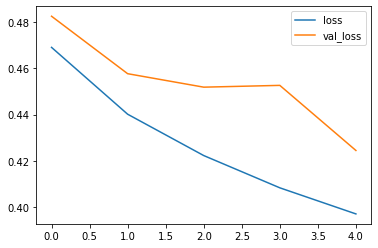

In [ ]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

Pakaitaliojam learning rate optimizeryje 

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6854 - accuracy: 0.7705 - val_loss: 0.4970 - val_accuracy: 0.8272
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4447 - accuracy: 0.8457 - val_loss: 0.4421 - val_accuracy: 0.8464
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4051 - accuracy: 0.8577 - val_loss: 0.4320 - val_accuracy: 0.8493: 0.4052 - accuracy: 0. - ETA: 0s - loss: 0.4051 - ac
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3833 - accuracy: 0.8654 - val_loss: 0.4097 - val_accuracy: 0.8542
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3662 - accuracy: 0.8701 - val_loss: 0.3973 - val_accuracy: 0.8568
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3534 - accuracy: 0.8742 - val_loss: 0.3962 - val_accuracy: 0.8576
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f296afb4f70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 545, in __del__
    gen_dataset_ops.delete_iterator(
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1263, in delete_iterator
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
KeyboardInterrupt: 


<AxesSubplot:>

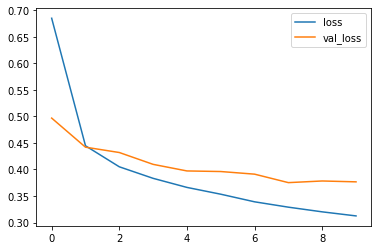

In [ ]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

Bandom overfittint

In [ ]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(256,activation='relu')) 
model.add(keras.layers.Dense(128,activation='relu')) 
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             #optimizer='adam', #NAUJAS OPTIMIZERIS, GALI LABAI PADET!!!
             optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


2021-12-01 17:06:16.491302: W tensorflow/stream_executor/platform/default/dso_loader.cc:65] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-12-01 17:06:16.491407: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-01 17:06:16.491453: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nw2ypv87ll): /proc/driver/nvidia/version does not exist


In [ ]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

2021-12-01 17:06:21.389881: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2021-12-01 17:06:21.826883: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5175 - accuracy: 0.8192 - val_loss: 0.4389 - val_accuracy: 0.8398
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3715 - accuracy: 0.8651 - val_loss: 0.4039 - val_accuracy: 0.8486
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3303 - accuracy: 0.8774 - val_loss: 0.3726 - val_accuracy: 0.8639
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3045 - accuracy: 0.8874 - val_loss: 0.3523 - val_accuracy: 0.8733
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2849 - accuracy: 0.8937 - val_loss: 0.3523 - val_accuracy: 0.8721
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2679 - accuracy: 0.9004 - val_loss: 0.3448 - val_accuracy: 0.8755
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2562 - accuracy: 0.9044 - val_loss: 0.3372 -

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

# Bandom su dropoutu

In [5]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(256,activation='relu')) 
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(128,activation='relu')) 
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             #optimizer='adam', #NAUJAS OPTIMIZERIS, GALI LABAI PADET!!!
             optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)               

In [6]:
keras.layers.Dropout?

In [55]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,
                batch_size=156)
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

Epoch 1/50


TypeError: ignored

In [ ]:
inp = keras.layers.Input(input_shape=(28,28))
out = keras.layers.Flatter()(inp)
out = keras.layers.Dense(256,activations='relu')(out)
model.add(keras.layers.Dropout(0,4))(out)
out = keras.layers.Dense(128,activations='relu')(out)
model.add(keras.layers.Dropout(0,4))(out)
out = keras.layers.Dense(64,activations='relu')(out)
model.add(keras.layers.Dropout(0,4))(out)
out = keras.layers.Dense(10,activations='relu')(out)
model.add(keras.layers.Dropout(0,4))(out)
model = keras.models.Model(inputs=inp,outputs=out)
model.summary()